In [1]:
from src.models.patch_mlp import PatchMLPModel, Game
from src.models.unet import UnetModel
from src.models.conv import ConvModel
from src.player import *
from src.utils import pyplot_game
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)
unet = UnetModel.load('weights/unet_16x30_64.pth', device)
conv = ConvModel.load('weights/conv_3x3_64.pth', device)
patch = PatchMLPModel.load('weights/patch_mlp_7x7_1024.pth', device)
unet_player = ThresholdPlayer(unet, 0.01, 0.99)
patch_player = ThresholdPlayer(patch, 0.01, 0.99)
conv_player = ThresholdPlayer(conv, 0.01, 0.99)

cpu


In [3]:
# 9 = closed cledd, 10 = flag
g = np.array([[
    [9,9,9,9,9,9,9,9,9],
    [9,10,4,2,2,9,9,1,9],
    [10,10,2,1,10,2,1,2,9],
    [2,2,1,2,2,2,0,2,9],
    [0,1,1,2,10,1,1,3,9],
    [0,1,10,2,1,2,3,10,9],
    [0,1,1,1,0,1,10,10,9],
]])

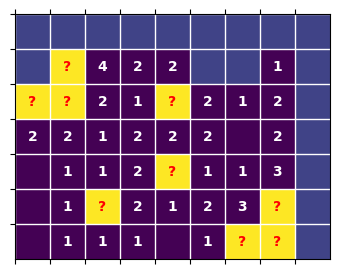

In [4]:
ax, s, h = pyplot_game(g[0], print_zeros=False)

In [5]:
model = conv
player = conv_player

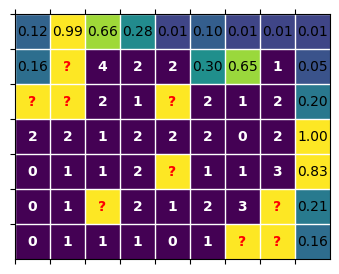

(<Axes: >, <matplotlib.image.AxesImage at 0x1cdc37b9f40>, None)

In [6]:
p = model(g, np.array([12]))
pyplot_game(g[0], mine_probs=p[0])

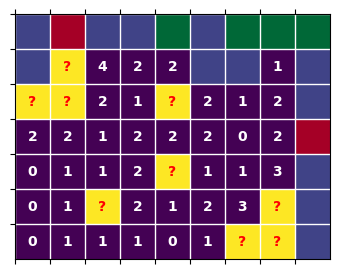

In [7]:
player.plot_moves(g[0], np.array([12]))

In [8]:
g = Game(n=1)
z = g.open_zero()

[ True]
[False]


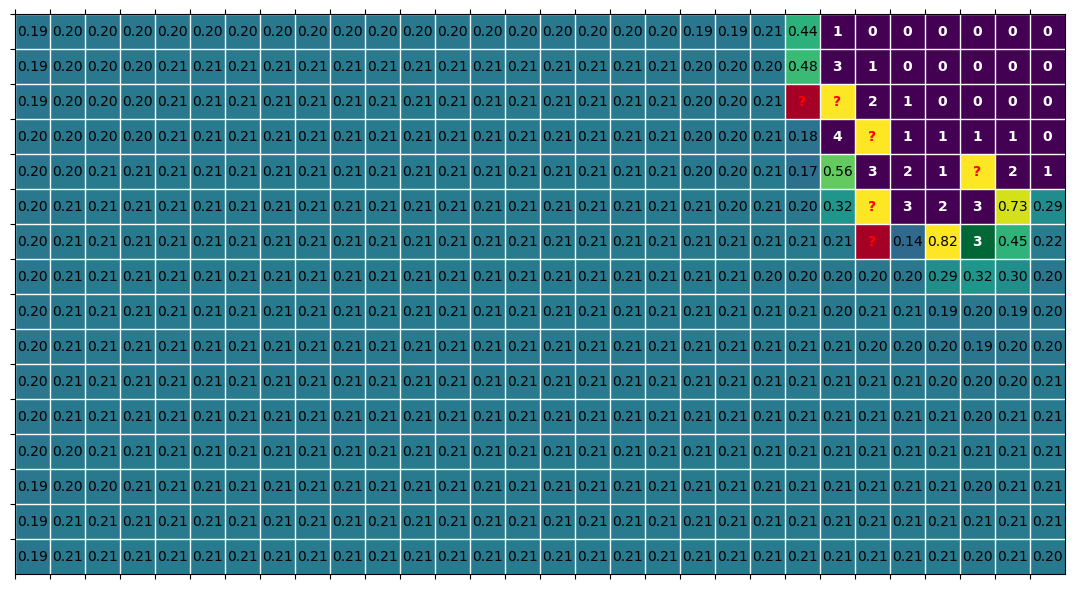

(<Axes: >,
 <matplotlib.image.AxesImage at 0x1cdc59119d0>)

In [9]:
t = player.play(g, 5)
print(g.active_games)
print(g.won)
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='last_moves', print_zeros= True, size=0.35) # highlight newly opened in red

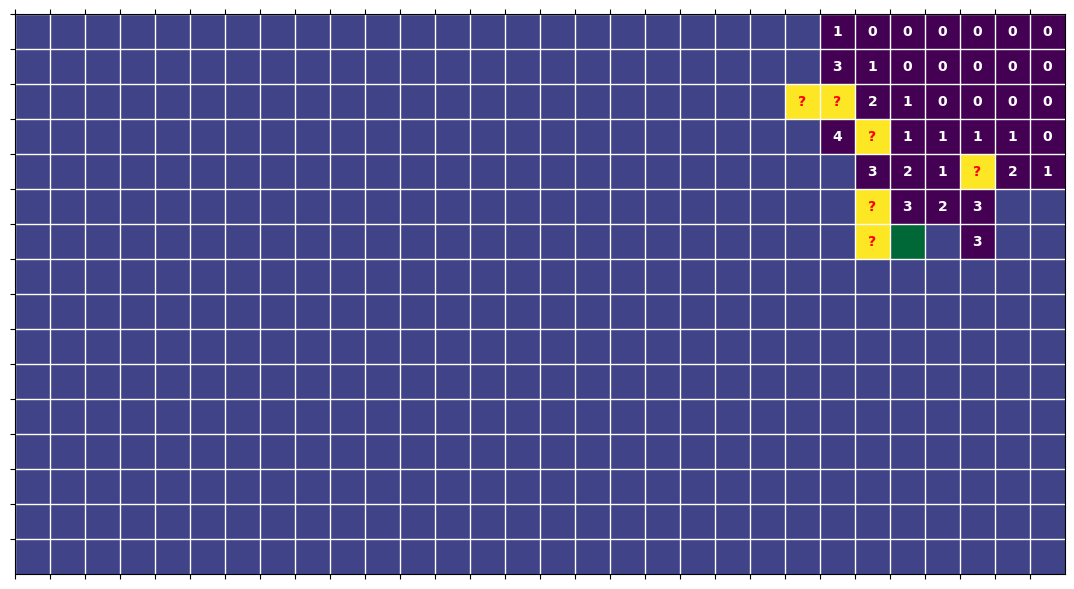

In [10]:
player.plot_game_moves(g)

[False]
[ True]
[1.]


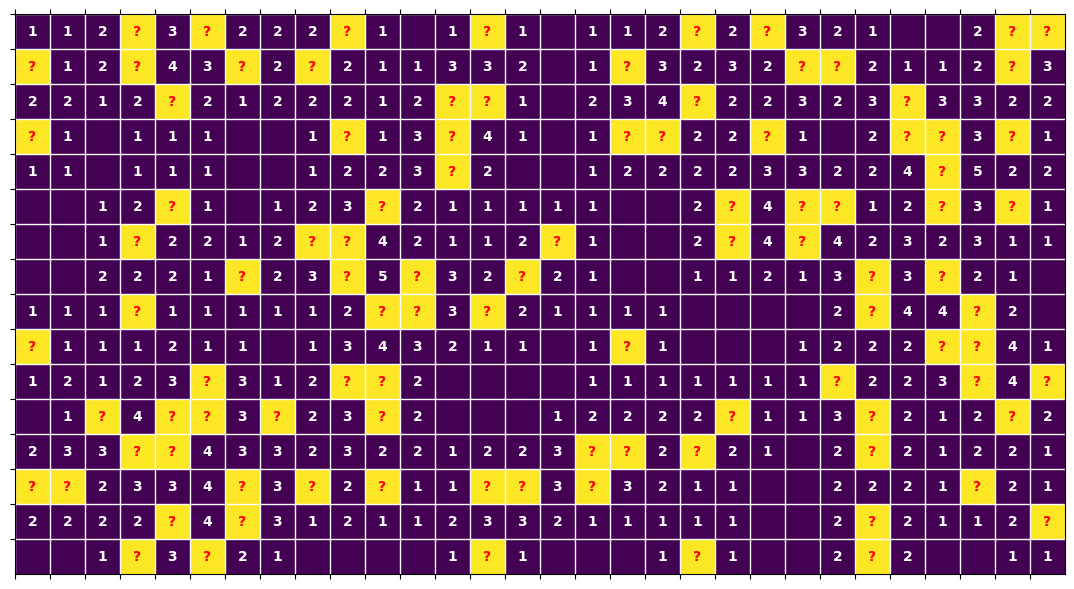

(<Axes: >,
 <matplotlib.image.AxesImage at 0x1cdc5fe3b00>)

In [11]:
g = Game(n=1)
z = g.open_zero()
player.play(g) # play untill the end
print(g.active_games)
print(g.won)
print(g.scores())
p = model(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='losing', print_zeros=False)

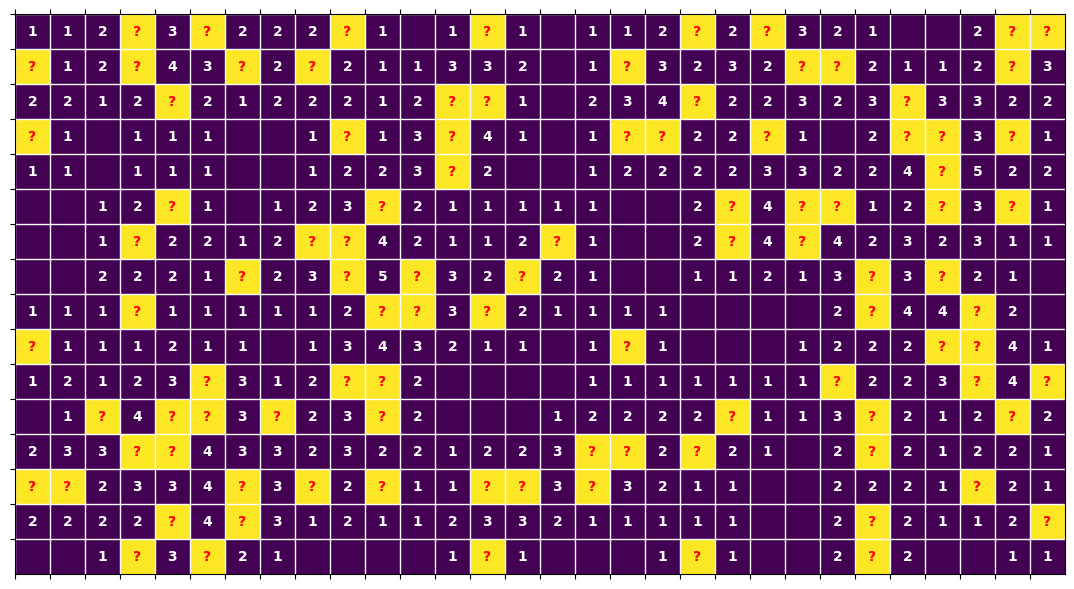

(<Axes: >,
 <matplotlib.image.AxesImage at 0x1cdc641e9c0>)

In [12]:
p = unet(g.game_state(), g.mines_n)
g.pyplot_game(0, mine_probs=p[0], highlighted='losing', print_zeros=False)

In [21]:
games = Game(16, 30, 99, 100)
zeros = games.open_zero()
player.play(games)
print(f'patch: average score: {np.average(games.scores(final_only=True))}')
print(f'\twin rate: {games.win_rate()}')

patch: average score: 0.9263254593175856
	win rate: 0.51


In [22]:
games.reset()
games.move(zeros)
unet_player.play(games)
print(f'unet: average score: {np.average(games.scores(final_only=True))}')
print(f'\twin rate: {games.win_rate()}')

unet: average score: 0.9015748031496064
	win rate: 0.39


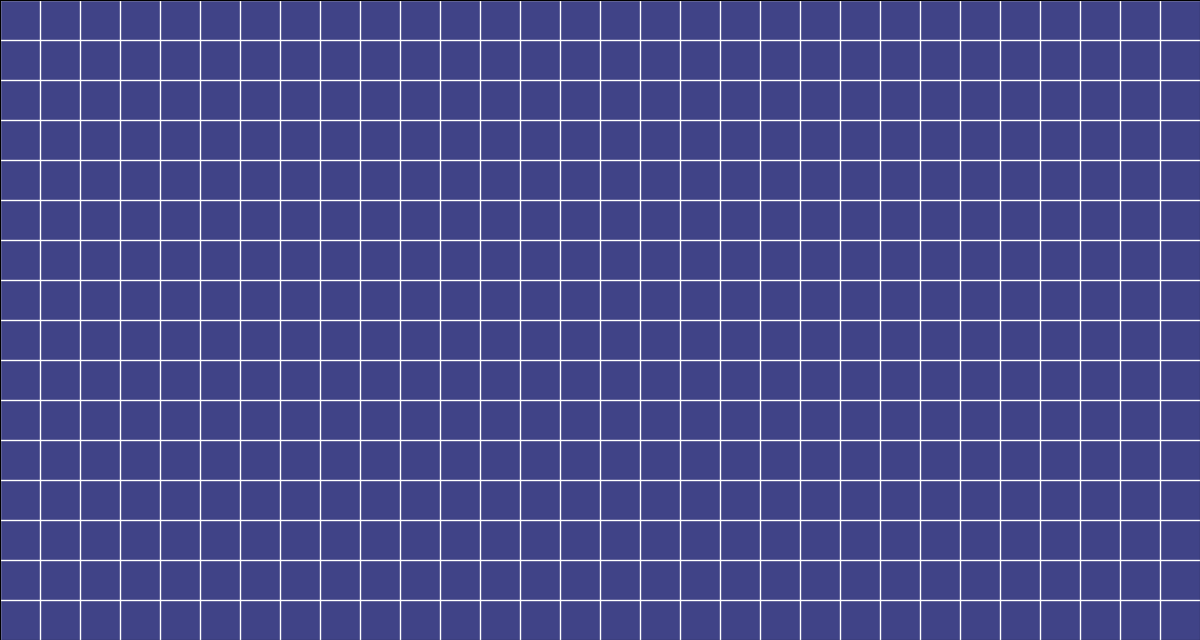

MovieWriter ffmpeg unavailable; using Pillow instead.


In [24]:
%matplotlib widget
g = Game(16, 30, 99, n=1)
animation = GameAnimation(g, player)
plt.show()
animation.animation.save('animation.gif')